In [23]:
from qsee.compilation.qsp import QuantumStatePreparation
from qsee.core import ansatz, state, gradient, optimizer
from qsee.backend import constant, utilities
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import os
import base.Gradient
import base.object
import base.hamiltonian
import numpy as np, qiskit
import tqix as tq

from matplotlib.ticker import FuncFormatter
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
n_row=2
n_column=3
num_qubits=n_row*n_column
thetas=np.random.rand(2*num_qubits) * 4 * np.pi

h1=base.hamiltonian.h1_2D(n_row,n_column,thetas)


0 1
0 3
0 4
1 2
1 0
1 4
1 5
1 3
2 1
2 5
2 4
3 4
3 0
3 1
4 5
4 3
4 1
4 0
4 2
5 4
5 2
5 1


In [25]:
print(h1.shape)

(64, 64)


In [26]:
print(base.object.psi_0(num_qubits).shape)

(64, 1)


-5.999999999999995
0
0.007546206243191023
0.030130622796669115
0.0675912325948218
0.11965996403974977
0.18596559828625736
0.2660377839272634
0.35931210460987817
0.46513613102096407
0.5827763756582085
0.7114260570490174
0.8502135697724986
0.9982115479339582
1.154446402762975
1.3179082098530275
1.4875608182999969
1.6623520526636346
1.8412238792739615
2.0231224109043366
2.207007628175235
2.3918627021470327
2.5767028102885012
2.7605833472257952
2.9426074422169526
3.1219327069717027
3.2977771500408704
3.4694242073165555
3.636226851986621
3.7976107613429013
3.9530765319192085
4.10220094830261
4.244637324396906
4.3801149487088065
4.508437677177536
4.629481727997912
4.743192742636354
4.849582185673304
4.948723163113743
5.040745744306843
5.125831876550922
5.204209983804403
5.276149341679592
5.341954320094176
5.401958582653098
5.4565193281143225
5.506011654263105
5.550823118309362
5.591348560679024
5.627985250955698
5.661128405919015
5.691167120304821
5.718480741269393
5.74343570776604
5.7663828

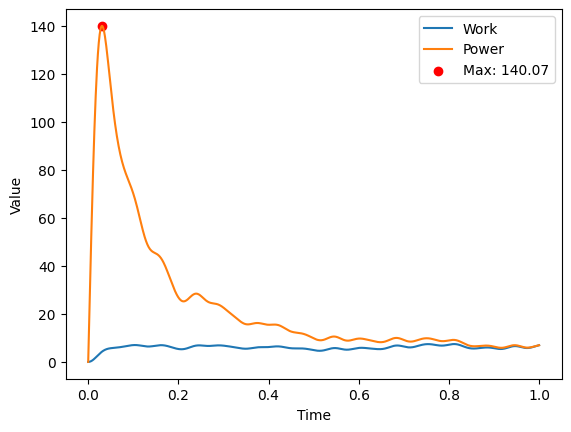

In [27]:
def test(num_qubits, t1,h1,shots):
    """
        Return array time , W , P

        INPUT:
          t: time
          thetas: array parameter (length 2*(N-1))
          shots: number of measurement times

    """

    time=np.linspace(0,t1,shots)
    arrayW=[]
    arrayP=[]
    h0=base.hamiltonian.h0(num_qubits,h=1)
    ps0=base.object.psi_0(num_qubits)
    E0=np.real( (tq.daggx(ps0)) @h0@ ps0)[0, 0]
    print(E0)
    for t in time:
        w = 0
        p = 0
        if(t!=0):
            w = base.object.E(t,h1,h0,ps0) - E0
            p = w/t
        
        print(w)
        arrayW.append(w)
        arrayP.append(p)

    return time,arrayP,arrayW
t = 2
ltime,arP,arW=test(num_qubits,t,h1,shots=1024)

max_value=np.max(arP)
max_index = np.argmax(arP)
max_time = ltime[max_index]
plt.plot(ltime, arW, label="Work")
plt.plot(ltime, arP, label="Power")
plt.xlabel('Time')
plt.ylabel('Value')
plt.scatter(max_time, max_value, color='red', label=f"Max: {np.round(max_value, 2)}")
plt.legend()
plt.show()


In [30]:
iteration=100
Pmaxs=[]
tmaxs=[]

for i in range(iteration):
    h1=base.hamiltonian.h1_2D(n_row,n_column,thetas)
    _, Pmax, tmax = base.Gradient.Pmax(num_qubits, t,h1,shots=1024)
    Pmaxs.append(Pmax)
    tmaxs.append(tmax)
    grad_C = base.Gradient.grad_2D_Pmax(n_row,n_column, tmax, thetas, h1)
    thetas -= 1 * grad_C

plt.plot(range(0, iteration), Pmaxs, label=f"Pmaxs at {num_qubits} qubits")

    

0 1
0 3
0 4
1 2
1 0
1 4
1 5
1 3
2 1
2 5
2 4
3 4
3 0
3 1
4 5
4 3
4 1
4 0
4 2
5 4
5 2
5 1
-5.999999999999995


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()